# 리베로 함수
player 앱의 views.py 맨 상단에 위에 함수들 중 정의 안되어있는거 있으면 추가 해주세요

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 

import platform
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False
if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    path='C:/Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system...')

- 아래 libero 함수는
- DB불러오는 부분이랑
- static에 사진 저장하는 경로만 수정하면 됩니다

In [2]:
def libero(csv):

    h_cap_lst = ['김명관', '김선호', '김형진', '문성민', '박경민', '박상하', '박주형', '박준혁', '송원근', '송준호', '여오현', '이원중', '이준승', '전광인', '차영석', '최민호', '최은석', '펠리페', '함형진', '허수봉', '홍동선', '히메네즈']

    #df = pd.read_csv("C:/kovo/top_libero.csv", encoding = "CP949")

    libero = df
    # 파생 컬럼 생성
    libero["공격 성공률"] = libero["공격 성공"]/libero["공격 시도"]
    libero["공격 효율"] = (libero["공격 성공"] - libero["공격 상대 블락"] - libero["공격 범실"])/libero["공격 시도"]
    libero["서브 성공률"] = libero["서브 성공"]/libero["서브 시도"]
    libero["세트 성공률"] = libero["세트 성공"]/libero["세트 시도"]
    libero["블로킹 성공률"] = libero["블로킹 성공"]/libero["블로킹 시도"]
    libero["리시브 효율"] = (libero["리시브 정확"]-libero["리시브 실패"])/libero["리시브 시도"]
    libero["디그 성공률"] = libero["디그 성공"]/libero["디그 시도"]

    top_libero = libero.iloc[:,[1,2,-1,-3,-4]]
    top_libero = top_libero.fillna(0)

    # 2021 KOVO 리베로 선수들 중 디그 성공률로 순위를 표현한 데이터프레임
    top_libero_dig = top_libero.sort_values(by = "디그 성공률",ascending = False)
    top_libero_dig["순위"] = np.arange(1,len(top_libero_dig)+1)
    top_libero_dig.set_index("순위",inplace = True)

    # 2021 KOVO 리베로 선수들 중 블로킹 성공률로 순위를 표현한 데이터프레임
    top_libero_blocking = top_libero.sort_values(by = "블로킹 성공률",ascending = False)
    top_libero_blocking["순위"] = np.arange(1,len(top_libero_blocking)+1)
    top_libero_blocking.set_index("순위",inplace = True)

    # 2021 KOVO 리베로 선수들 중 세트 성공률로 순위를 표현한 데이터프레임
    top_libero_set = top_libero.sort_values(by = "세트 성공률",ascending = False)
    top_libero_set["순위"] = np.arange(1,len(top_libero_set)+1)
    top_libero_set.set_index("순위",inplace = True)

    # 디그 성공률로 순위 매긴 데이터프레임에서 디그성공률 값만 가져와 리스트로 생성
    # 추후 디그 성공률 산점도에 x축으로 넣어줄 값임
    dig_suc = top_libero_dig["디그 성공률"].tolist()
    blocking_suc = top_libero_blocking["블로킹 성공률"].tolist()
    set_suc = top_libero_set["세트 성공률"].tolist()

    libero.set_index('Rank', inplace=True)
    libero_lst = libero['선수명'].tolist()

    for i, player in enumerate(h_cap_lst):

            if player in libero_lst:
                plt.figure(figsize=(9,7),facecolor = "white")

                plt.subplot(2,1,1)
                # 그래프 작성하려면 y축 값도 있긴 해야해서 y값 리스트 생성
                y_dig = np.zeros(len(dig_suc))+1.3

                # y축 삭제하기위해 ax 설정
                ax = plt.gca()

                # 모든 선수 점 찍기
                plt.scatter(dig_suc,y_dig,c = "black")

                # 이거 참고해서 조건문으로 해당 선수만 가져오면 될 듯
                plt.scatter(top_libero_dig.loc[top_libero_dig["선수명"]==player,"디그 성공률"],1.3,s=150,c ="r")

                plt.ylim(0.1,-0.1)
                plt.title('디그 성공률' , fontsize = 15)
                plt.ylabel('Y-Axis')
                plt.axis('scaled')

                # x축 y축 삭제
                ax.axes.yaxis.set_visible(False)
                plt.gca().axes.xaxis.set_visible(False)


                plt.subplot(2,1,2)
                y_set = np.zeros(len(set_suc))+0
                ax = plt.gca()
                plt.scatter(set_suc,y_set,c = "black")

                # 이거 참고해서 조건문으로 해당 선수만 가져오면 될 듯
                plt.scatter(top_libero_set.loc[top_libero_set["선수명"]==player,"세트 성공률"],0,s=150,c ="r")

                plt.ylim(0.1,-0.1)
                plt.title('세트 성공률' , fontsize = 15)
                plt.ylabel('Y-Axis')
                plt.axis('scaled')

                # x축 y축 삭제
                ax.axes.yaxis.set_visible(False)
                plt.gca().axes.xaxis.set_visible(False)

                plt.savefig('C:/image/'+str(player)+'_순위.png', bbox_inches = 'tight')

                

            else:
                pass


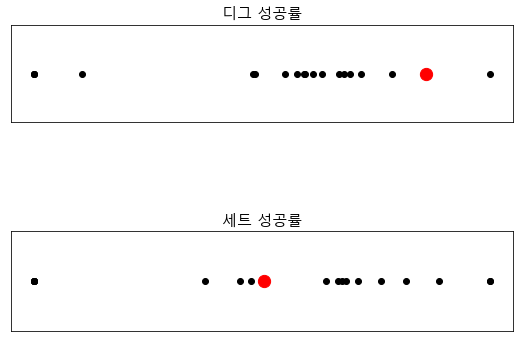

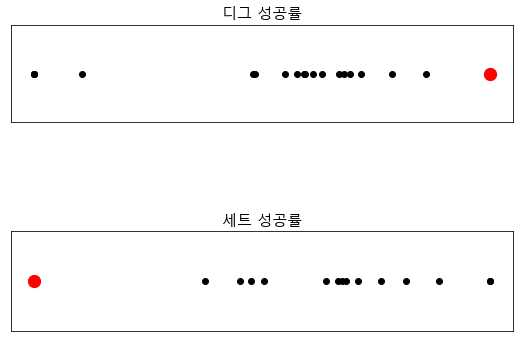

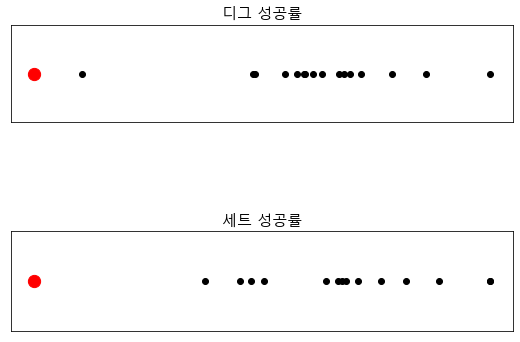

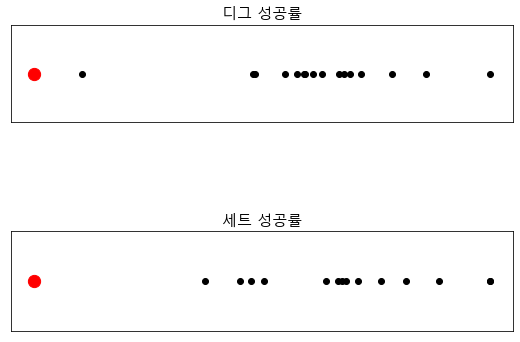

In [3]:
df = pd.read_csv("C:/kovo/top_libero.csv", encoding = "CP949")
libero(df)